# Soccer Data
This dataset contains data of every game from the 2018-2019 season in the English Premier League.

In [ ]:
import pandas as pd

pd.read_csv("soccer18-19.csv")

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,E0,10/8/18,Man United,Leicester,2,1,H,1,0,H,A Marriner,8,13,6,4,11,8,2,5,2,1,0,0
1,E0,11/8/18,Bournemouth,Cardiff,2,0,H,1,0,H,K Friend,12,10,4,1,11,9,7,4,1,1,0,0
2,E0,11/8/18,Fulham,Crystal Palace,0,2,A,0,1,A,M Dean,15,10,6,9,9,11,5,5,1,2,0,0
3,E0,11/8/18,Huddersfield,Chelsea,0,3,A,0,2,A,C Kavanagh,6,13,1,4,9,8,2,5,2,1,0,0
4,E0,11/8/18,Newcastle,Tottenham,1,2,A,1,2,A,M Atkinson,15,15,2,5,11,12,3,5,2,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,E0,12/5/19,Liverpool,Wolves,2,0,H,1,0,H,M Atkinson,13,7,5,2,3,11,4,1,0,2,0,0
376,E0,12/5/19,Man United,Cardiff,0,2,A,0,1,A,J Moss,26,13,10,4,9,6,11,2,3,3,0,0
377,E0,12/5/19,Southampton,Huddersfield,1,1,D,1,0,H,L Probert,10,10,3,3,8,6,4,3,0,1,0,0
378,E0,12/5/19,Tottenham,Everton,2,2,D,1,0,H,A Marriner,11,17,3,9,10,13,7,4,0,2,0,0


## Data Dictionary
| Column    | Explanation                                   |
| --------- | --------------------------------------------- |
| Div       | Division the game was played in               |                            
| Date      | The date the game was played                  |
| HomeTeam  | The home team                                 |
| AwayTeam  | The away team                                 |
| FTHG      | Full time home goals                          |
| FTAG      | Full time away goals                          |
| FTR       | Full time result                              |
| HTHG      | Half time home goals                          |
| HTAG      | Half time away goals                          |
| HTR       | Half time result                              |
| Referee   | The referee of the game                       |
| HS        | Number of shots taken by home team            |
| AS        | Number of shots taken by away team            |
| HST       | Number of shots taken by home team on target  |
| AST       | Number of shots taken by away team on target  |
| HF        | Number of fouls made by home team             |
| AF        | Number of fouls made by away team             |
| HC        | Number of corners taken by home team          |
| AC        | Number of corners taken by away team          |
| HY        | Number of yellow cards received by home team  |
| AY        | Number of yellow cards received by away team  |
| HR        | Number of red cards received by home team     |
| AR        | Number of red cards received by away team     |

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
data = pd.read_csv("soccer18-19.csv")

TEAM WITH THE MOST FOULS

In [ ]:
data[['HomeTeam','AwayTeam']].isna().sum()

HomeTeam    0
AwayTeam    0
dtype: int64

In [ ]:
home_team = data.groupby(['HomeTeam'], as_index=False)['HF'].sum()
home_team

,HomeTeam,HF
0,Arsenal,218
1,Bournemouth,187
2,Brighton,221
3,Burnley,184
4,Cardiff,195
5,Chelsea,154
6,Crystal Palace,180
7,Everton,218
8,Fulham,199
9,Huddersfield,214


In [ ]:
away_team = data.groupby(['AwayTeam'],as_index=False)['AF'].sum()
away_team

,AwayTeam,AF
0,Arsenal,194
1,Bournemouth,152
2,Brighton,242
3,Burnley,175
4,Cardiff,189
5,Chelsea,185
6,Crystal Palace,206
7,Everton,214
8,Fulham,224
9,Huddersfield,206


In [ ]:
away_home_team_foul = pd.merge(home_team, away_team, left_on='HomeTeam',right_on='AwayTeam')
away_home_team_foul['Total_Foul'] = away_home_team_foul['HF'] + away_home_team_foul['AF']
away_home_team_foul_5 = away_home_team_foul.head(5)
away_home_team_foul_5

,HomeTeam,HF,AwayTeam,AF,Total_Foul
0,Arsenal,218,Arsenal,194,412
1,Bournemouth,187,Bournemouth,152,339
2,Brighton,221,Brighton,242,463
3,Burnley,184,Burnley,175,359
4,Cardiff,195,Cardiff,189,384


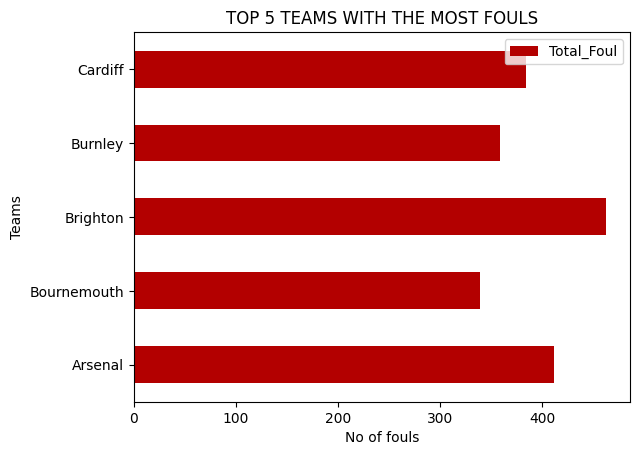

In [ ]:
away_home_team_foul_5.plot(kind='barh', y='Total_Foul', x='HomeTeam',xlabel = 'No of fouls',ylabel='Teams',color='#b30000').set_title('TOP 5 TEAMS WITH THE MOST FOULS')
plt.show()

## Plot the percentage of games that ended in a draw over time.


In [ ]:
#convert the date column to date datatype and check the info
data['Date'] = pd.to_datetime(data['Date'])
games_time = data[['FTR','Date']]
games_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   FTR     380 non-null    object        
 1   Date    380 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 6.1+ KB


Number of home,away win and draw games

In [ ]:
#
games_time['Month'] = games_time['Date'].dt.month
games_result_month = games_time.groupby('Month', as_index=False)['FTR'].value_counts()
games_result_month

,Month,FTR,count
0,1,H,23
1,1,A,11
2,1,D,7
3,2,H,26
4,2,A,12
5,2,D,8
6,3,H,17
7,3,A,11
8,3,D,3
9,4,H,22


Brighton Football Team has the highest numbers of fouls in the season

Number of games that ended in a draw for each month

In [ ]:
drawn_games = games_result_month[games_result_month['FTR'] == 'D'].reset_index(drop=True)
drawn_games

,Month,FTR,count
0,1,D,7
1,2,D,8
2,3,D,3
3,4,D,9
4,5,D,5
5,6,D,1
6,7,D,1
7,8,D,4
8,9,D,7
9,10,D,10


A plot of percentage of games that ended in a draw over the season in each month

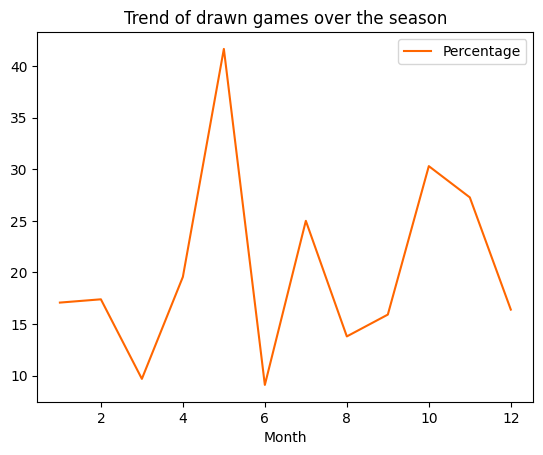

In [ ]:
games_time_month = games_time.groupby('Month', as_index=False)['FTR'].count().rename(columns={'FTR':'Total_result'})
games_time_month = games_time_month.join(drawn_games['count']).rename(columns={'count':'drawn_results'})

games_time_month['Percentage'] = (games_time_month['drawn_results']/games_time_month['Total_result'])*100

games_time_month.plot(kind='line', x='Month',y='Percentage',color='#ff6600').set_title('Trend of drawn games over the season')
plt.show()

## Does the number of red cards a team receives have an effect on its probability of winning a game?

In [ ]:
data_u = data[['HomeTeam','AwayTeam','FTHG','FTAG','HTHG','HTAG','FTR','HTR','HS','AS','HR','AR']]

Relationship between red card and half time score

In [ ]:
data_red_half = data_u[['FTR','HR','AR']]
data_red_half.head()
data[['FTHG','HR','AR']]

,FTHG,HR,AR
0,2,0,0
1,2,0,0
2,0,0,0
3,0,0,0
4,1,0,0
...,...,...,...
375,2,0,0
376,0,0,0
377,1,0,0
378,2,0,0


In [ ]:
num_home = data[['HR','FTR']].groupby(['HR']).value_counts(normalize=True).reset_index(name='Count')
num_home

,HR,FTR,Count
0,0,H,0.488950
1,0,A,0.320442
2,0,D,0.190608
3,1,A,0.666667
4,1,H,0.222222
5,1,D,0.111111


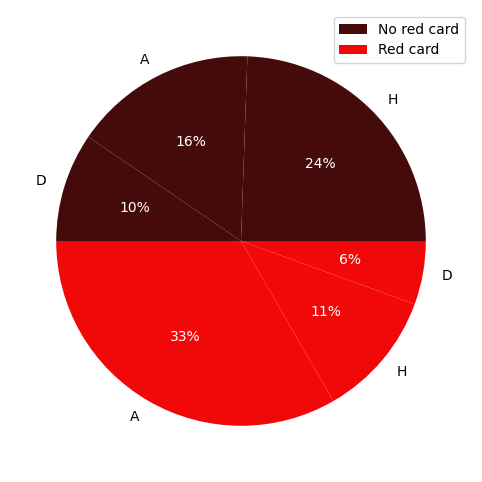

In [ ]:
from matplotlib.patches import Patch

colour_dict = {'0':'#450B0B','1':'#F10909'}

#create pie chart
fig, ax = plt.subplots(figsize=(9, 6))

_, _, autotext = plt.pie(num_home['Count'], labels=num_home['FTR'], colors=num_home['HR'].replace({0:'#450B0B',1:'#F10909'}), autopct='%.0f%%')

for i in autotext:
    i.set_color('white')

plt.legend(
    [
        Patch(facecolor=colour_dict['0']),
        Patch(facecolor=colour_dict['1'])
    ], ["No red card", "Red card"], loc = 'upper right'
)

plt.show()

<AxesSubplot: xlabel='HR', ylabel='count'>

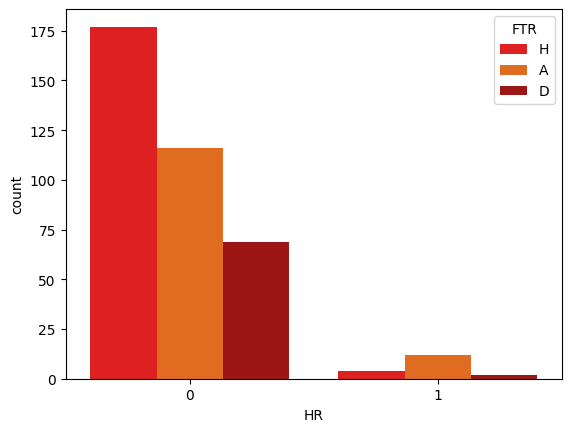

In [ ]:
sns.countplot(data=data,  x='HR', hue='FTR',palette=['#ff0000','#ff6600','#b30000'])

In [ ]:
#manipulate to have figures for all red cards represented by 1 in the AR column
num_away = data[['AR','FTR']].groupby(['AR']).value_counts(normalize=True).reset_index(name='Count')
num_away



,AR,FTR,Count
0,0,H,0.474432
1,0,A,0.343750
2,0,D,0.181818
3,1,H,0.481481
4,1,A,0.259259
5,1,D,0.259259
6,2,H,1.000000


In [ ]:
num_away.loc[6,'AR'] = 1
num_away

,AR,FTR,Count
0,0,H,0.474432
1,0,A,0.343750
2,0,D,0.181818
3,1,H,0.481481
4,1,A,0.259259
5,1,D,0.259259
6,1,H,1.000000


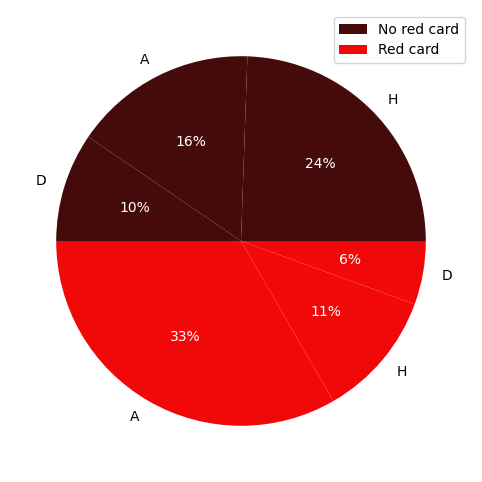

In [ ]:
colour_dict = {'0':'#450B0B','1':'#F10909'}

#create pie chart
fig, ax = plt.subplots(figsize=(9, 6))

_, _, autotext = plt.pie(num_home['Count'], labels=num_home['FTR'], colors=num_home['HR'].replace({0:'#450B0B',1:'#F10909'}), autopct='%.0f%%')

for i in autotext:
    i.set_color('white')

plt.legend(
    [
        Patch(facecolor=colour_dict['0']),
        Patch(facecolor=colour_dict['1'])
    ], ["No red card", "Red card"], loc = 'upper right'
)

plt.show()

<AxesSubplot: xlabel='AR', ylabel='count'>

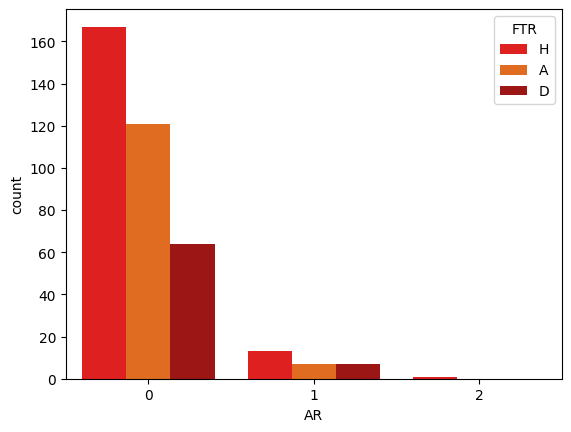

In [ ]:
sns.countplot(data=data,  x='AR', hue='FTR',palette=['#ff0000','#ff6600','#b30000'])

The two plots above shows that the opposite teams have higher probability of winning in the case of a red card.

But, is there a significant difference in the number of win rates for opposite team in the case of a red card?

In [ ]:
import pingouin as pg
observed_manual = pd.crosstab(index=data_red_half["FTR"], columns=data_red_half["HR"],margins=False)
expected, observed_pingouin, stats = pg.chi2_independence(data_red_half, x='HR', y='FTR')

print(observed_manual)
print(" ")
print(observed_pingouin)

HR     0   1
FTR         
A    116  12
D     69   2
H    177   4
 
FTR    A   D    H
HR               
0    116  69  177
1     12   2    4


In [ ]:
print(stats)

                 test    lambda      chi2  dof      pval    cramer     power
0             pearson  1.000000  9.243378  2.0  0.009836  0.155964  0.782314
1        cressie-read  0.666667  8.965216  2.0  0.011304  0.153599  0.768980
2      log-likelihood  0.000000  8.647475  2.0  0.013250  0.150853  0.752952
3       freeman-tukey -0.500000  8.607176  2.0  0.013520  0.150501  0.750857
4  mod-log-likelihood -1.000000  8.735870  2.0  0.012677  0.151622  0.757498
5              neyman -2.000000  9.544881  2.0  0.008460  0.158487  0.796049


In [ ]:
observed_manual = pd.crosstab(index=data_red_half["FTR"], columns=data_red_half["AR"],margins=False)
expected, observed_pingouin, stats = pg.chi2_independence(data_red_half, x='FTR', y='AR',correction=True)

print(observed_manual)
print(" ")
print(observed_pingouin)

AR     0   1  2
FTR            
A    121   7  0
D     64   7  0
H    167  13  1
 
AR     0   1  2
FTR            
A    121   7  0
D     64   7  0
H    167  13  1


In [ ]:
print(stats)

                 test    lambda      chi2  dof      pval    cramer     power
0             pearson  1.000000  2.441298  4.0  0.655177  0.056677  0.119275
1        cressie-read  0.666667  2.477515  4.0  0.648667  0.057095  0.120428
2      log-likelihood  0.000000  2.784846  4.0  0.594451  0.060533  0.130338
3       freeman-tukey -0.500000       NaN  4.0       NaN       NaN       NaN
4  mod-log-likelihood -1.000000       inf  4.0  0.000000       inf  1.000000
5              neyman -2.000000       NaN  4.0       NaN       NaN       NaN


From the results of the chi2 test of independence, we can conclude that there is a statistical significance of a home team win being affected in the case of a red card and no significance when the away team gets a red card.

## I wonder, how many games ended as a lost/draw after winning by half time for the home team?

In [ ]:
data_u_hl = data_u[(data_u['HTR'] == 'H') & (data_u['FTR'] == 'A')]
data_u_hl = data_u_hl.groupby('HomeTeam')['FTR'].value_counts()
data_u_hl

HomeTeam        FTR
Crystal Palace  A      1
Fulham          A      1
Tottenham       A      1
West Ham        A      1
Name: FTR, dtype: int64

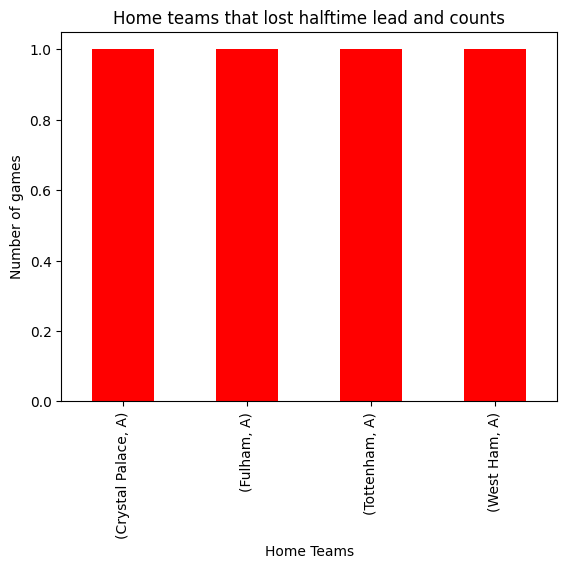

In [ ]:
data_u_hl.plot(kind='bar', x='HomeTeam', y='Count', color='#ff0000')
plt.xticks(rotation=90, horizontalalignment="center")
plt.title('Home teams that lost halftime lead and counts')
plt.xlabel('Home Teams')
plt.ylabel('Number of games')
plt.show()

In [ ]:
data_u_hld = data_u[(data_u['HTR'] == 'H') & ((data_u['FTR'] == 'A') | (data_u['FTR'] == 'D'))]
data_u_hld = data_u_hld.groupby(['HomeTeam'])['FTR'].value_counts().reset_index(name='Count')
data_u_hld

,HomeTeam,FTR,Count
0,Arsenal,D,1
1,Bournemouth,D,1
2,Brighton,D,1
3,Burnley,D,1
4,Chelsea,D,2
5,Crystal Palace,A,1
6,Crystal Palace,D,1
7,Everton,D,1
8,Fulham,A,1
9,Fulham,D,1


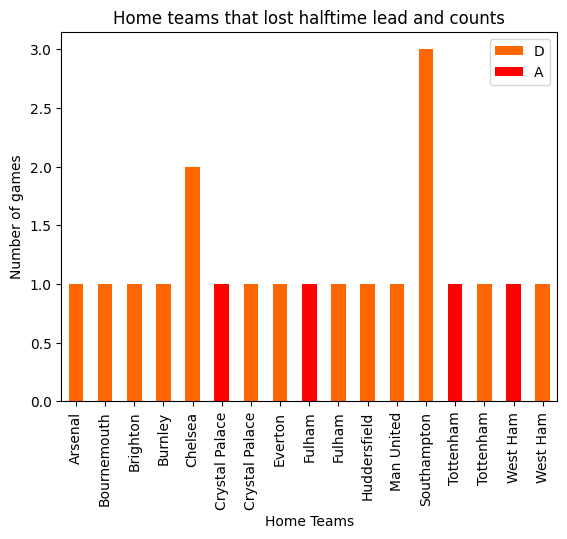

In [ ]:
from matplotlib.patches import Patch

colour_dict = {'H':'green','A':'#ff0000','D':'#ff6600'}
data_u_hld.plot(kind='bar', x='HomeTeam', y='Count', color=data_u_hld['FTR'].replace({'H':'green','D':'#ff6600','A':'#ff0000'}))
plt.xticks(rotation=90, horizontalalignment="center")
plt.title('Home teams that lost halftime lead and counts')
plt.xlabel('Home Teams')
plt.ylabel('Number of games')
plt.legend(
    [
        Patch(facecolor=colour_dict['D']),
        Patch(facecolor=colour_dict['A'])
    ], ["D", "A"]
)
plt.show()

## How about the away team?

In [ ]:
data_u_ald = data_u[(data_u['HTR'] == 'A') & ((data_u['FTR'] == 'H') | (data_u['FTR'] == 'D'))]
data_u_ald = data_u_ald.groupby(['AwayTeam'])[['FTR','HTR']].value_counts().reset_index(name='Count')
data_u_ald

,AwayTeam,FTR,HTR,Count
0,Arsenal,D,A,1
1,Bournemouth,D,A,1
2,Brighton,H,A,1
3,Chelsea,H,A,1
4,Crystal Palace,H,A,2
5,Crystal Palace,D,A,1
6,Everton,H,A,1
7,Fulham,D,A,1
8,Huddersfield,H,A,1
9,Man City,H,A,1


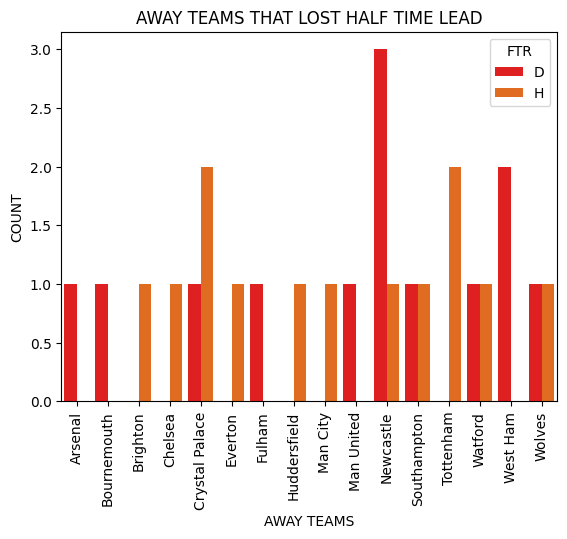

In [ ]:
ax = sns.barplot(data=data_u_ald,x='AwayTeam',y='Count',hue='FTR',palette=['#ff0000','#ff6600'])
ax.set_title('AWAY TEAMS THAT LOST HALF TIME LEAD')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xlabel('AWAY TEAMS')
ax.set_ylabel('COUNT')
plt.show()

In [ ]:
data_u_referee_HR = data.groupby('Referee')['HR'].value_counts().reset_index(name='count')
data_u_referee_AR = data.groupby('Referee')['AR'].value_counts().reset_index(name='count')
data_u_referee_AR

,Referee,AR,count
0,A Madley,0,2
1,A Marriner,0,26
2,A Marriner,1,1
3,A Taylor,0,31
4,A Taylor,1,1
5,C Kavanagh,0,23
6,C Kavanagh,1,1
7,C Pawson,0,21
8,C Pawson,1,4
9,C Pawson,2,1


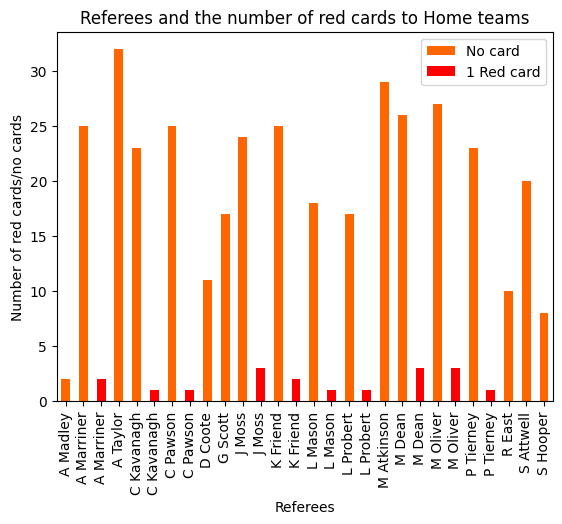

In [ ]:
colour_dict = {'0':'#ff6600','1':'#ff0000'}
data_u_referee_HR.plot(kind='bar', x='Referee', y='count', color=data_u_referee_HR['HR'].replace({0:'#ff6600',1:'#ff0000'}))
plt.xticks(rotation=90, horizontalalignment="center")
plt.title('Referees and the number of red cards to Home teams')
plt.xlabel('Referees')
plt.ylabel('Number of red cards/no cards')
plt.legend(
    [
        Patch(facecolor=colour_dict['0']),
        Patch(facecolor=colour_dict['1'])
    ], ["No card", "1 Red card"]
)
plt.show()

None of the Referees gave more than 1 red card to the Home team for the season.

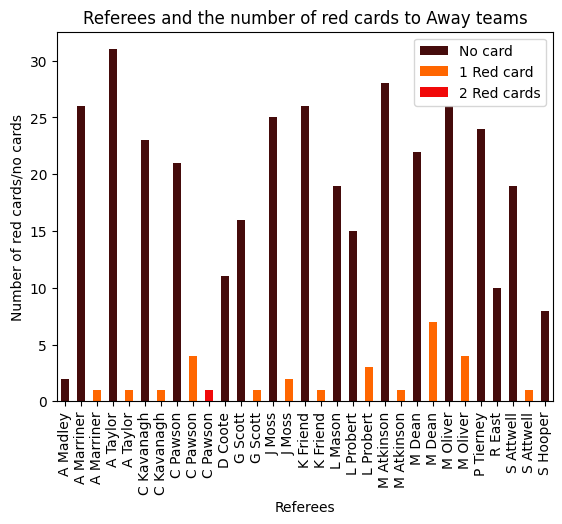

In [ ]:
colour_dict = {'0':'#450B0B','1':'#ff6600','2':'#F10909'}
data_u_referee_AR.plot(kind='bar', x='Referee', y='count', color=data_u_referee_AR['AR'].replace({0:'#450B0B',1:'#ff6600',2:'#F10909'}))
plt.xticks(rotation=90, horizontalalignment="center")
plt.title('Referees and the number of red cards to Away teams')
plt.xlabel('Referees')
plt.ylabel('Number of red cards/no cards')
plt.legend(
    [
        Patch(facecolor=colour_dict['0']),
        Patch(facecolor=colour_dict['1']),
        Patch(facecolor=colour_dict['2'])
    ], ["No card", "1 Red card","2 Red cards"]
)
plt.show()

C Pawson is the ony referee that gave more than 1 red card to any of the teams and it was to an away team.

In [ ]:
data_u_ref_red = data[['Referee','HR','AR']]
data_u_ref_red = data.groupby(['Referee'])['Referee'].count().reset_index(name='c')
data_u_ref_red

,Referee,c
0,A Madley,2
1,A Marriner,27
2,A Taylor,32
3,C Kavanagh,24
4,C Pawson,26
5,D Coote,11
6,G Scott,17
7,J Moss,27
8,K Friend,27
9,L Mason,19


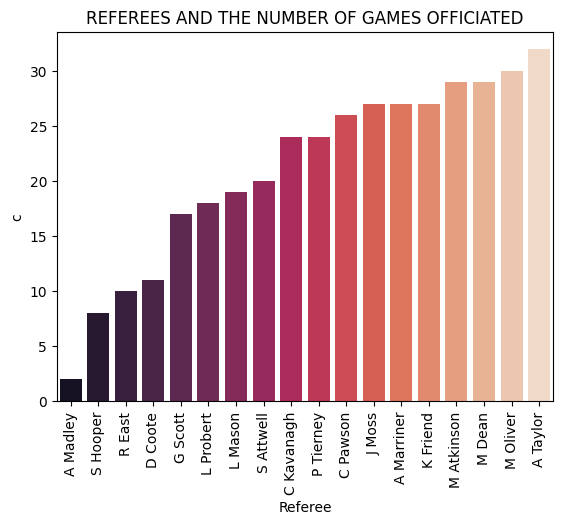

In [ ]:
ax = sns.barplot(x='Referee',y='c',data=data_u_ref_red,palette='rocket',order=data_u_ref_red.sort_values('c').Referee)
ax.set_title('REFEREES AND THE NUMBER OF GAMES OFFICIATED')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

In [ ]:
#create additional features, month and day the game was played
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,Month,Day
0,E0,2018-10-08,Man United,Leicester,2,1,H,1,0,H,A Marriner,8,13,6,4,11,8,2,5,2,1,0,0,10,8
1,E0,2018-11-08,Bournemouth,Cardiff,2,0,H,1,0,H,K Friend,12,10,4,1,11,9,7,4,1,1,0,0,11,8
2,E0,2018-11-08,Fulham,Crystal Palace,0,2,A,0,1,A,M Dean,15,10,6,9,9,11,5,5,1,2,0,0,11,8
3,E0,2018-11-08,Huddersfield,Chelsea,0,3,A,0,2,A,C Kavanagh,6,13,1,4,9,8,2,5,2,1,0,0,11,8
4,E0,2018-11-08,Newcastle,Tottenham,1,2,A,1,2,A,M Atkinson,15,15,2,5,11,12,3,5,2,2,0,0,11,8


## Can we predict the final result of matches based on the data we have?

We will use Random forest and Gradient boost classifiers with Randomised and Grid search, just to see how their performance differs

In [ ]:
#prepare date into predictor features and target feature

X = data.drop(['Date','Div','FTR'],axis=1)
X = pd.get_dummies(X,drop_first=True).values
y = data['FTR'].values

In [ ]:
#import required packages

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score
from sklearn.model_selection import train_test_split,RandomizedSearchCV, GridSearchCV

In [ ]:
#split data into training and testing set

X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y, random_state=2121)

In [ ]:
#instantiate models

GB = GradientBoostingClassifier()
RF   = RandomForestClassifier()

#define parameters for both models

param_grid = {'n_estimators': np.arange(80,130,2),
               'max_features': ['auto', 'sqrt', 'log2',None],
               'min_samples_split': [2,6],
               'min_samples_leaf': [1,2],
               'bootstrap': [True, False]
             }

param_grids = {'n_estimators': np.arange(80,130,2),
               'max_features': ['auto', 'sqrt', 'log2',None],
               'min_samples_split': [2,6],
               'min_samples_leaf': [1,2]
             }


In [ ]:
#define function for the random forest model

def models_RF(classifier, param,X,y):
    RSC_rf = RandomizedSearchCV(classifier, param_distributions  = param_grid, cv = 5, n_jobs=1)
    GSC_rf = GridSearchCV(classifier, param_grid=param_grid, cv = 5, n_jobs=1)

    RSC_rf = RSC_rf.fit(X,y)
    GSC_rf = GSC_rf.fit(X,y)
    return RSC_rf, GSC_rf

#define function for the gradient boosting model

def models_GB(classifier, param,X,y):
    RSC_gb = RandomizedSearchCV(classifier, param_distributions  = param_grids, cv = 5, n_jobs=1)
    GSC_gb = GridSearchCV(classifier, param_grid=param_grids, cv = 5, n_jobs=1)

    RSC_gb = RSC_gb.fit(X,y)
    GSC_gb = GSC_gb.fit(X,y)

    return RSC_gb, GSC_gb

In [ ]:
#instantiate models

RandomF_results = models_RF(RF, param_grid,X_train, y_train)
GradientB_results = models_GB(GB, param_grid,X_train, y_train)

#select the various instances

RandomF_results_randomized = RandomF_results[0]
RandomF_results_grid = RandomF_results[1]

GradientB_results_randomized = GradientB_results[0]
GradientB_results_grid = GradientB_results[1]


In [ ]:
#best parameters for the Random Forest classifier for both random and grid models

print('Best parameters for Random Forest classifier using RandomSearchCV: ', RandomF_results_randomized.best_params_, '\n')
print('Best parameters for Random Forest classifier using GridearchCV: ', RandomF_results_grid.best_params_, '\n')
print('Best parameters for Gradient Boosting classifier using RandomSearchCV: ', GradientB_results_randomized.best_params_, '\n')
print('Best parameters for Gradient Boosting classifier using GridSearchCV: ', GradientB_results_grid.best_params_, '\n')


Best parameters for Random Forest classifier using RandomSearchCV:  {'n_estimators': 82, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None, 'bootstrap': False} 

Best parameters for Random Forest classifier using GridearchCV:  {'bootstrap': True, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 80} 

Best parameters for Gradient Boosting classifier using RandomSearchCV:  {'n_estimators': 86, 'min_samples_split': 6, 'min_samples_leaf': 2, 'max_features': None} 

Best parameters for Gradient Boosting classifier using GridSearchCV:  {'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 88} 



In [ ]:
#print scores for each model

print('Random Forest scores with RandomizedSearchCV: ')
metrics_score(RandomF_results_randomized)
print('Random Forest scores with GridSearchCV: ')
metrics_score(RandomF_results_grid)
print('Gradient Boosting scores with RandomisedSearchCV: ')
metrics_score(GradientB_results_randomized)
print('Gradient Boosting scores with GridSearchCV: ')
metrics_score(GradientB_results_grid)

Random Forest scores with RandomizedSearchCV: 


NameError: name 'metrics_score' is not defined

The Random Forest Classifier used as base model for RandomSearchCV has the lowest scores.

## To predict outcome of game by results at halftime, however;
##

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

y = LabelEncoder().fit_transform(data['FTR'])
X = LabelEncoder().fit_transform(data['HTR'])

X_train, X_test, y_train,y_test = train_test_split(X.reshape(-1,1),y,test_size=0.2,stratify = y,random_state=2121)
LR = LogisticRegression().fit(X_train,y_train)
RF = random
y_pred = LR.predict(X_test)

print('Our model gives an accuracy score of: ', accuracy_score(y_test, y_pred))

WIll Random forest model with parameter tuning give better accuracy?

In [ ]:
RF   = RandomForestClassifier()

#define parameters for both models

param_grid = {'n_estimators': np.arange(80,130,2),
               'max_features': ['auto', 'sqrt', 'log2',None],
               'min_samples_split': [2,6],
               'min_samples_leaf': [1,2],
               'bootstrap': [True, False]
             }

# RSC_rf = RandomizedSearchCV(classifier, param_distributions  = param_grid, cv = 5, n_jobs=1)
GSC_rf = GridSearchCV(RF, param_grid=param_grid, cv = 5, n_jobs=1)

# RSC_rf = RSC_rf.fit(X,y)
GSC_rf = GSC_rf.fit(X_train,y_train)
y_pred = GSC_rf.predict(X_test)

print('Our model gives an accuracy score of: ', accuracy_score(y_test, y_pred))

Our model gives an accuracy score of:  0.6447368421052632


# REPORT

I performed data cleaning, exploration, analysing and visualisation of the dataset. Some of the insights I got from the datset includes;
- Teams that lost half time leads
- Referees with the most number of red cards
- Red cards affects the win probability of the teams

The manager can predict the full-time result with about 66% confidence.

I recommend that the model be deployed to improve the management of the squad by the manager. A proper pipeline should be used that facilitate  introduction of new data to enhance the model. I also recommend that more features(factors) be considered when trying to predict the outcome of a match, such as red cards, injury to certain players, faqitue level of the players, expected goals. Including these features will improve the accuracy of the model and gives the manager better confidence when deciding to give young players some minutes. Finally, proper maintenance of the model is deployed.